# General Imports

    !! IMPORTANT !!
    If you did NOT install opengrid with pip, 
    make sure the path to the opengrid folder is added to your PYTHONPATH

In [5]:
import os
import inspect
import sys
import pandas as pd
import charts
import numpy as np
import pylab as pl
from scipy import spatial
from scipy.spatial import distance


from opengrid.library import houseprint

Server running in the folder /usr/local/opengrid/notebooks/Analysis/Thesis_Max&Jean at 127.0.0.1:52212


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

## Houseprint

In [5]:
hp = houseprint.Houseprint()
# for testing:
# hp = houseprint.Houseprint(spreadsheet='unit and integration test houseprint')

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
30 Sites created
30 Devices created
87 sensors created
Houseprint parsing complete


### TMPO

The houseprint, sites, devices and sensors all have a get_data method. In order to get these working for the fluksosensors, the houseprint creates a tmpo session.

## Lookup sites, devices, sensors based on key

These methods return a single object

In [6]:
hp.find_site(1)


    Site
    Key: 1
    1 devices
    6 sensors
    

In [7]:
hp.find_device('FL03001441')


    Fluksometer
    Key: FL03001441
    5 sensors
    

In [8]:
sensor = hp.find_sensor('d5a747b86224834f745f4c9775d70241')

In [9]:
print(sensor.site)
print(sensor.unit)


    Site
    Key: 15
    1 devices
    6 sensors
    
liter


## Lookup sites, devices, sensors based on search criteria

These methods return a list with objects satisfying the criteria

hp.search_sites(inhabitants=5)

hp.search_sensors(type='gas', direction='Import')

### TESTING METHODS 

In [19]:
gas = hp.find_sensor('212ce724e124fbde0fb649396375d099')

In [20]:
gas


    Fluksosensor
    Key: 212ce724e124fbde0fb649396375d099
    Type: gas
    

In [21]:
head = pd.Timestamp('20151114')
tail = pd.Timestamp('20151115')
originalGraph = gas.get_data(head=head, tail=tail, diff=True, resample='min', unit='kW')
charts.plot(originalGraph, stock=True, show='inline')

In [22]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print originalGraph

2015-11-14 06:08:00+00:00          NaN
2015-11-14 06:09:00+00:00          NaN
2015-11-14 06:10:00+00:00     7.911992
2015-11-14 06:11:00+00:00     7.781684
2015-11-14 06:12:00+00:00     9.437340
2015-11-14 06:13:00+00:00    11.609244
2015-11-14 06:14:00+00:00    14.014286
2015-11-14 06:15:00+00:00    14.880000
2015-11-14 06:16:00+00:00    14.640000
2015-11-14 06:17:00+00:00    14.680000
2015-11-14 06:18:00+00:00    14.600000
2015-11-14 06:19:00+00:00    14.640000
2015-11-14 06:20:00+00:00    14.298462
2015-11-14 06:21:00+00:00    14.076923
2015-11-14 06:22:00+00:00    13.598901
2015-11-14 06:23:00+00:00    13.071429
2015-11-14 06:24:00+00:00    12.576355
2015-11-14 06:25:00+00:00    12.337931
2015-11-14 06:26:00+00:00    11.735484
2015-11-14 06:27:00+00:00    11.377016
2015-11-14 06:28:00+00:00    11.040441
2015-11-14 06:29:00+00:00    10.588235
2015-11-14 06:30:00+00:00    10.144538
2015-11-14 06:31:00+00:00     9.725097
2015-11-14 06:32:00+00:00     9.610242
2015-11-14 06:33:00+00:00

In [23]:
timeStart = pd.Timestamp('20151114')
timeStop = pd.Timestamp('20151115')
gasData = originalGraph.dropna()

Lijst met versch electriciteitsmetingen van 5 nov 2015 tem 6 nov 2015

Hier Moving average filter opzetten (Type van een low-pass filter om smoothing toe te passen)

In [24]:
movingAverage = pd.rolling_mean(gasData,2)

Concatinate 2 dataframes. One being the original dataset, one smoothed with a movering average filter

In [25]:
df = pd.concat([gasData,movingAverage], axis=1, keys =('A','B'))

### Plot Moving Average + Original Data

In [26]:
charts.plot(df,stock=True,show='inline')

In [27]:
derivative = gasData.diff()

Concatinate gasData and the derivative

In [28]:
chartPlot = pd.concat([gasData, derivative], axis = 1, keys = ('A','B'))

### Derivative + Original Data

In [29]:
charts.plot(chartPlot, stock = True, show ='inline')

### List Values

In [30]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print originalGraph

2015-11-14 06:08:00+00:00          NaN
2015-11-14 06:09:00+00:00          NaN
2015-11-14 06:10:00+00:00     7.911992
2015-11-14 06:11:00+00:00     7.781684
2015-11-14 06:12:00+00:00     9.437340
2015-11-14 06:13:00+00:00    11.609244
2015-11-14 06:14:00+00:00    14.014286
2015-11-14 06:15:00+00:00    14.880000
2015-11-14 06:16:00+00:00    14.640000
2015-11-14 06:17:00+00:00    14.680000
2015-11-14 06:18:00+00:00    14.600000
2015-11-14 06:19:00+00:00    14.640000
2015-11-14 06:20:00+00:00    14.298462
2015-11-14 06:21:00+00:00    14.076923
2015-11-14 06:22:00+00:00    13.598901
2015-11-14 06:23:00+00:00    13.071429
2015-11-14 06:24:00+00:00    12.576355
2015-11-14 06:25:00+00:00    12.337931
2015-11-14 06:26:00+00:00    11.735484
2015-11-14 06:27:00+00:00    11.377016
2015-11-14 06:28:00+00:00    11.040441
2015-11-14 06:29:00+00:00    10.588235
2015-11-14 06:30:00+00:00    10.144538
2015-11-14 06:31:00+00:00     9.725097
2015-11-14 06:32:00+00:00     9.610242
2015-11-14 06:33:00+00:00

### Variables:

gasData,
movingAverage,
derivative

<h2>Implementing SAX</h2>

In [31]:
dataFrame1= pd.DataFrame({'col1':[2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34], 
                         'col2':[0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72]})
charts.plot(dataFrame1, stock=True, show='inline')

<h3>Implementing z-score</h3>

In [32]:
column1 = pd.DataFrame([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])
column2 = pd.DataFrame([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72])
saxExample = pd.concat([column1,column2], axis=1)
saxExample.columns=['A','B']
saxExample

,A,B
0,2.02,0.50
1,2.33,1.29
2,2.99,2.58
3,6.85,3.83
4,9.20,3.25
5,8.80,4.25
6,7.50,3.83
7,6.00,5.63
8,5.85,6.44
9,3.85,6.25


In [33]:
#meanCol1 = column1.mean()
#stdCol2 = column1.std()
#meanCol2 = column2.mean()
#stdCol2 = column2.std()
def znormalization(ts):
    #Pakt mean, std van kolom.
    meanCalc = ts.mean(axis = 0)
    stdCalc = ts.std(axis = 0)
    return (ts - meanCalc) / stdCalc

In [34]:
zScores=znormalization(saxExample)

In [35]:
#zScoreCol1 = (column1-meanCol1)/stdCol1
#zScoreCol2 = (column2-meanCol2)/stdCol2
#zScores = pd.concat([zScoreCol1,zScoreCol2],axis = 1)
#zScores.columns=['Col1','Col2']
#zScores
charts.plot(zScores,stock=True,show='inline')

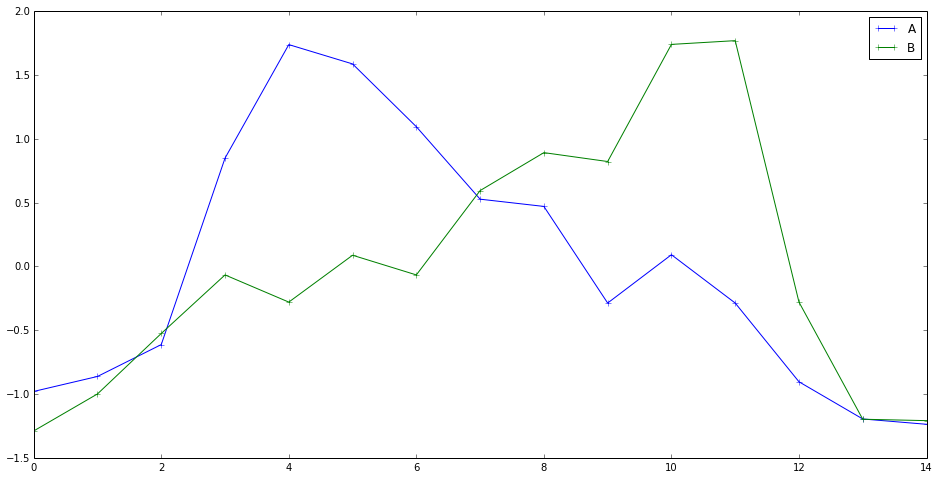

In [36]:
zScores.plot(style="-+")

<h3>Paa transformation of z normalized graphs</h3>

In [37]:
def paa_transform(timeSeries, n_pieces):
    splitted = np.array_split(timeSeries, n_pieces) ## along columns as we want
    return np.asarray(map(lambda xs: xs.mean(axis = 0), splitted))

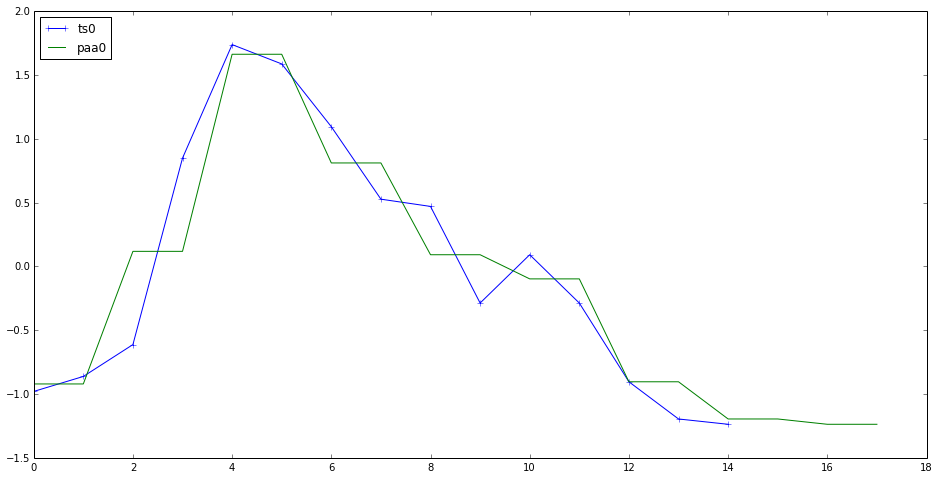

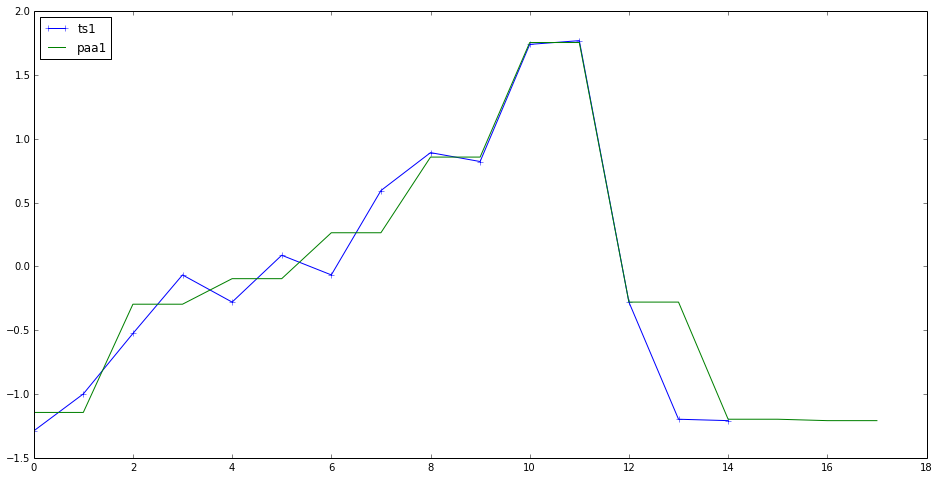

In [39]:
dfzScores=pd.DataFrame(zScores) #z-normalization
dfzScores.columns=('col1','col2')

dfPaaTransfo=pd.DataFrame(paaTransfo) #paa
dfPaaTransfo.columns=('col1','col2')

concat = pd.concat([dfzScores,dfPaaTransfo])
charts.plot(concat,stock=True,show='inline')

In [40]:
def sax_transform(ts, n_pieces, alphabet):
    """
    ts: columns of which are time serieses represented by np.array
    n_pieces: number of segments in paa transformation
    alphabet: the letters to be translated to, e.g. "abcd", "ab"
    return np.array of ts's sax transformation
    Steps:
    1. znormalize
    2. paa
    3. find norm distribution breakpoints by scipy.stats
    4. convert paa transformation into strings
    """
    from scipy.stats import norm
    alphabet_sz = len(alphabet)
    thrholds = norm.ppf(np.linspace(1./alphabet_sz, 
                                    1-1./alphabet_sz, 
                                    alphabet_sz-1))
    def translate(ts_values):
        return np.asarray([(alphabet[0] if ts_value < thrholds[0]
                else (alphabet[-1] if ts_value > thrholds[-1]
                      else alphabet[np.where(thrholds <= ts_value)[0][-1]+1]))
                           for ts_value in ts_values])
    paa_ts = paa_transform(znormalization(ts), n_pieces)
    return np.apply_along_axis(translate, 0, paa_ts)

<h3>applying sax transformation</h3>

In [41]:
array1=sax_transform(saxExample, 9, "abcdef")
array1

array([['b', 'a'],
       ['d', 'c'],
       ['f', 'c'],
       ['e', 'd'],
       ['d', 'e'],
       ['c', 'f'],
       ['b', 'c'],
       ['a', 'a'],
       ['a', 'a']], 
      dtype='|S1')

In [42]:
sax=pd.DataFrame(array1)
sax.columns=("col1","col2")

<h3>Make array of values from the letters</h3>

In [52]:
def makeArray(array1):
    arrayValues=[]    
    for i in range(0, array1.size): ##Range doesnt include last one
        if(i<=array1.size):
            arrayValues.append(ord(array1.iloc[i])-97)
    df=pd.DataFrame(arrayValues)
    return df

In [53]:
lettersToNumbers = pd.concat([makeArray(sax.col1),makeArray(sax.col2)],axis=1)
lettersToNumbers.columns=['col1','col2']
lettersToNumbers

test 0
array: 9
test 1
array: 9
test 2
array: 9
test 3
array: 9
test 4
array: 9
test 5
array: 9
test 6
array: 9
test 7
array: 9
test 8
array: 9
test 0
array: 9
test 1
array: 9
test 2
array: 9
test 3
array: 9
test 4
array: 9
test 5
array: 9
test 6
array: 9
test 7
array: 9
test 8
array: 9


,col1,col2
0,1,0
1,3,2
2,5,2
3,4,3
4,3,4
5,2,5
6,1,2
7,0,0
8,0,0


In [45]:
arrayLettersToNumbers=lettersToNumbers.col1.as_matrix()
arrayLettersToNumbersRepeat=np.repeat(arrayLettersToNumbers,2)
charts.plot(arrayLettersToNumbersRepeat, stock=True, show='inline')

<h3>Comparing sax_alphabet_graph with paa values</h3>

In [35]:
saxAndPaa=pd.concat([dfPaaTransfo.col1,znormalization(pd.DataFrame(arrayLettersToNumbersRepeat))],axis=1)
saxAndPaa.columns=("col1","col2")
charts.plot(saxAndPaa, stock=True,show='inline')

<h3>Comparing orignal znormalized graph with sax</h3>

In [36]:
newGraph=pd.concat([znormalization(pd.DataFrame(arrayLettersToNumbersRepeat)),znormalization(column1)],axis=1)
newGraph.columns=['A','B']
charts.plot(newGraph,stock=True,show='inline')

<h3>Making dataframes of value differences between successive values</h3>

In [37]:
def makeDiffArray(array): #Excepts a letter array
    arrayValues=[]    
    for i in range(0, array.size-1):
        if(i<array.size):
             arrayValues.append(ord(array.iloc[i+1])-ord(array.iloc[i]))
    df=pd.DataFrame(arrayValues)
    return df          


In [38]:
successive_df = pd.concat([makeDiffArray(sax.col1),makeDiffArray(sax.col2)],axis=1)
successive_df.columns=['col1','col2']
successive_df


,col1,col2
0,2,2
1,2,0
2,-1,1
3,-1,1
4,-1,1
5,-1,-3
6,-1,-2
7,0,0


<h3>Calculating sax differences</h3>

Differences are calculated between 2 arrays to see howmuch they are alike.
We want values around 0 or 1.

In [39]:
def differenceNumbers(array): #Expects array of numbers @
    arrayValues=[]
    for i in range(0, array.index.size):
        arrayValues.append(np.diff(array.iloc[i], axis=-1))
    df=pd.DataFrame(arrayValues)
    return df

In [13]:
def diffArrays(array1,array2):
    array=[]
    if array1.index.size==array2.index.size:
        for i in range(0,array1.index.size):
            array.append(array2.iloc[i]-array1.iloc[i])
    df=pd.DataFrame(array)
    return df

In [6]:
arrayOfOnes=[]
array2OfOnes=[]
for i in range (0,87):
    arrayOfOnes.append(1)
    dfArrayOfOnes=pd.DataFrame(arrayOfOnes)
for i in range (0,82):
    array2OfOnes.append(2)
    dfArray2OfOnes=pd.DataFrame(array2OfOnes)

reCalculating difference between successive values of the array.
This shows howmuch alike the arrays are with respect to the change of sucessive values.

A lot of 0 and 1's means that the graphs will be alike.

In [42]:
successive_difference_df = differenceNumbers(successive_df) #col2-col1
successive_difference_df

,0
0,0
1,-2
2,2
3,2
4,2
5,-2
6,-1
7,0


In [43]:
def differenceLetters(array1, array2): #Expects array of Letters
    array=[]
    if array1.index.size == array2.index.size:
        for i in range(0, array1.index.size-1):
            array.append(ord(array2.iloc[i])-ord(array1.iloc[i]))
    df=pd.DataFrame(array)
    return df

Best is to first change array to number values, at them together, and then perform differencing operation.

## Testing on actual data

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


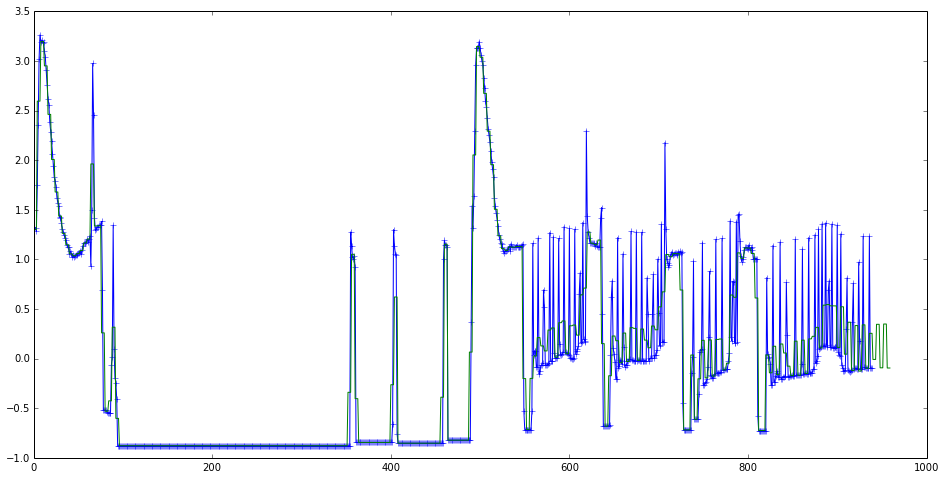

In [44]:
"""
First z-normalization
Then paa
"""

zScoresOriginalGraph=znormalization(originalGraph)
splitData = paa_transform(zScoresOriginalGraph,240)
splitData_ext = np.repeat(splitData,4,axis = 0)
pl.figure()
pl.plot(zScoresOriginalGraph, '-+')
pl.plot(splitData_ext)
pl.legend(loc = "upper left")



<h3>Comparing original graph with paa values</h3>

In [45]:
splitDataDf=pd.DataFrame(splitData_ext)
originalGraphDf=pd.DataFrame(originalGraph)
splitDataDf=splitDataDf.iloc[:splitDataDf.size-20]
splitDataDf.index=originalGraphDf.index
graph = pd.concat([splitDataDf,zScoresOriginalGraph],axis=1).dropna()
charts.plot(graph,stock=True,show='inline')

<h3>Paa and Sax graph</h3>

In [46]:

saxTransformation=sax_transform(originalGraph, 240, "abcdefghijklmn")


In [48]:
'''
Werkwijze:
Dataframes gebruiken!
-sax transfo
-letters->nummers (makeArray())
-np.repeat (plateau's)
-plot(paa_transform+repeater,^)
'''

letters=pd.DataFrame(saxTransformation)
letters.columns=['col1']
lettersToNumSax=makeArray(letters.col1) #Expects a pandaframe

repeatedValues=np.repeat(lettersToNumSax.as_matrix(),4) #expects an array

dfRepeatedValues=pd.DataFrame(repeatedValues)

dfRepeatedValues=dfRepeatedValues.iloc[:dfRepeatedValues.size-20]
splitDataDf.index=dfRepeatedValues.index

concatinatePaaAndSax=pd.concat([znormalization(dfRepeatedValues),splitDataDf],axis=1)
concatinatePaaAndSax.columns=['col1','col2']

charts.plot(concatinatePaaAndSax,stock=True,show='inline')


<h3>sax and original graph (znormalized)</h3>

In [49]:
dfRepeatedValues.index=zScoresOriginalGraph.index
saxVsOriginalGraph=pd.concat([(dfRepeatedValues), znormalization(originalGraph)],axis=1).dropna()
charts.plot(saxVsOriginalGraph, stock=True, show='inline')


<h2>Methods for measuring the similarity of the arrays</h2>

<h5>Hamming Distance (not so interesting for us)</h5>

In [50]:
def hammingDistance(s1, s2):
    """Return the Hamming distance between equal-length sequences"""
    if len(s1) != len(s2):
        raise ValueError("Undefined for sequences of unequal length")
    return sum(el1 != el2 for el1, el2 in zip(s1, s2))

<h5>Euclidean Distance</h5>

In [51]:
def euclideanDistance(s1,s2):
    #Verwacht een numpy array
    dist = np.linalg.norm(s1-s2)
    return dist

<h5>Cosine Similarity</h5>

In [52]:
def cosineSimilarity(s1,s2):
    similarity = 1 - spatial.distance.cosine(s1, s2)
    return similarity

<h5>Mahalanobis Distance</h5>

In [53]:
def mahalanobisDistance(s1,s2):
    similarity = 1 - distance.mahalanobis(s1,s2)
    return similarity

<h5>Manhattan Distance</h5>

In [23]:
def manhattanDistance(s1,s2):
    difference=diffArrays(s1,s2)
    absDifference=abs(difference)
    sumOfValues=np.sum(absDifference)
    maxValues=np.maximum(s1,s2)
    maxValues=np.max(maxValues)
    manhattan=sumOfValues/maxValues
    return sumOfValues

In [55]:
dfRepeatedValues2=dfRepeatedValues
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print dfRepeatedValues2


                            0
2015-11-14 06:08:00+00:00  12
2015-11-14 06:09:00+00:00  12
2015-11-14 06:10:00+00:00  12
2015-11-14 06:11:00+00:00  12
2015-11-14 06:12:00+00:00  13
2015-11-14 06:13:00+00:00  13
2015-11-14 06:14:00+00:00  13
2015-11-14 06:15:00+00:00  13
2015-11-14 06:16:00+00:00  13
2015-11-14 06:17:00+00:00  13
2015-11-14 06:18:00+00:00  13
2015-11-14 06:19:00+00:00  13
2015-11-14 06:20:00+00:00  13
2015-11-14 06:21:00+00:00  13
2015-11-14 06:22:00+00:00  13
2015-11-14 06:23:00+00:00  13
2015-11-14 06:24:00+00:00  13
2015-11-14 06:25:00+00:00  13
2015-11-14 06:26:00+00:00  13
2015-11-14 06:27:00+00:00  13
2015-11-14 06:28:00+00:00  13
2015-11-14 06:29:00+00:00  13
2015-11-14 06:30:00+00:00  13
2015-11-14 06:31:00+00:00  13
2015-11-14 06:32:00+00:00  13
2015-11-14 06:33:00+00:00  13
2015-11-14 06:34:00+00:00  13
2015-11-14 06:35:00+00:00  13
2015-11-14 06:36:00+00:00  12
2015-11-14 06:37:00+00:00  12
2015-11-14 06:38:00+00:00  12
2015-11-14 06:39:00+00:00  12
2015-11-14

In [2]:
sampleData1=dfRepeatedValues.ix[pd.Timestamp('2015-11-14 15:22:00+00:00'):pd.Timestamp('2015-11-14 16:48:00+00:00')]
sampleData2=dfRepeatedValues.ix[pd.Timestamp('2015-11-14 16:49:00+00:00'):pd.Timestamp('2015-11-14 18:18:00+00:00')]
sampleData3=dfRepeatedValues.ix[pd.Timestamp('2015-11-14 18:19:00+00:00'):pd.Timestamp('2015-11-14 19:40:00+00:00')]
sampleData1.columns=["sampleData1"]
sampleData2.columns=["sampleData2"]
sampleData3.columns=["sampleData3"]

NameError: name 'dfRepeatedValues' is not defined

In [57]:
array1=np.array((1,2,3,3,4,5,5,5,6,6,6,6,7,7,7,8,9,5,4,2,3))
array2=np.array((1,5,3,5,3,2,2,5,5,6,6,6,7,7,7,8,9,6,5,2,3))

euclideanDistance(array1,array2)

5.9160797830996161

In [1]:
shorterSampleData2


NameError: name 'shorterSampleData2' is not defined

In [58]:
shorterSampleData2=sampleData2.iloc[:sampleData2.size-3]
evenShorterSampleData2=sampleData2.iloc[:sampleData2.size-8]
shorterSampleData1=sampleData1.iloc[:sampleData1.size-5]
euclideanDistance(sampleData1.sampleData1,shorterSampleData2.sampleData2)

nparraySampleData1=np.array((sampleData1))
nparrayshorterSampleData1=np.array((shorterSampleData1))
nparraySampleData2=np.array((shorterSampleData2))
nparraySampleData3=np.array((sampleData3))
nparrayevenShorterSampleData2=np.array((evenShorterSampleData2))
print "euclideanDistance 1 and 2:", euclideanDistance(nparraySampleData1,nparraySampleData2)
print "euclideanDistance 1 and 3:", euclideanDistance(nparrayshorterSampleData1,nparraySampleData3)
print "euclideanDistance 2 and 3:", euclideanDistance(nparrayevenShorterSampleData2, nparraySampleData3)

euclideanDistance 1 and 2: 13.8564064606
euclideanDistance 1 and 3: 18.7616630393
euclideanDistance 2 and 3: 19.1833260933


In [9]:
manhattan1=[1,2,3,3,5,5,46,6,6,7]
manhattan2=[1,2,3,3,5,5,2,6,6,7]
dfManhattan1=pd.DataFrame(manhattan1)
dfManhattan2=pd.DataFrame(manhattan2)
sampleData1.index=dfArrayOfOnes.index
shorterSampleData2.index=dfArrayOfOnes.index
arraySth=diffArrays(sampleData1.sampleData1,shorterSampleData2.sampleData2)
arraySth
absValue=abs(arraySth)
sumsth=np.sum(absValue)
maxValue=np.maximum(sampleData1.sampleData1,shorterSampleData2.sampleData2)
maxValue=np.max(maxValue)
test=sumsth/maxValue
dfTest=pd.DataFrame(test)
dfTest

NameError: name 'sampleData1' is not defined

In [24]:
manhattan1=[1,1,2,3,4,5,6]
manhattan2=[1,1,4,6,4,2,3]
dfManhattan1=pd.DataFrame(manhattan1)
dfManhattan2=pd.DataFrame(manhattan2)
dfArrayOfOnes.columns=['col1'] 
#Als je met vershillende kolomnamen zit weet het prog niet welke je bedoelt, dus moet je deze definieren.
#dfManhattan1 en dfManhattan2 hebben zelfde kolomnamen. Daarom moet je niet nog eens defineren apart.
print "Manhattan with ones:", manhattanDistance(dfManhattan1,dfManhattan2)[0]


Manhattan with ones: 11


In [61]:
print "cosine similarity 1 and 2:", cosineSimilarity(sampleData1,shorterSampleData2)
print "cosine similarity 1 and 3:", cosineSimilarity(shorterSampleData1, sampleData3)
print "cosine similarity 2 and 3:", cosineSimilarity(evenShorterSampleData2, sampleData3)

cosine similarity 1 and 2: 0.985338592743
cosine similarity 1 and 3: 0.971915361645
cosine similarity 2 and 3: 0.967615533366


In [2]:
print "manhattan 1:", manhattanDistance(sampleData1.sampleData1,dfArrayOfOnes.col1)
print "manhattan 2:", manhattanDistance(sampleData1.sampleData1,shorterSampleData2.sampleData2)
print "manhattan 3:", manhattanDistance(sampleData3.sampleData3, evenShorterSampleData2.sampleData2)

print "Hier zien we duidelijk een verschil mbt gelijkaardigheid"

manhattan 1:

NameError: name 'manhattanDistance' is not defined

In [63]:
print "manhattan 1:", euclideanDistance(sampleData1.sampleData1,dfArrayOfOnes.col1)
print "manhattan 2:", euclideanDistance(sampleData1.sampleData1,shorterSampleData2.sampleData2)
print "manhattan 3:", euclideanDistance(nparrayevenShorterSampleData2, nparraySampleData3)

manhattan 1: 71.7774337797
manhattan 2: 13.8564064606
manhattan 3: 19.1833260933


In [ ]:
test=np.zeros(87)
test

## Device

In [ ]:
#return np.asarray(ord(sax.col1.iloc[i+1])-ord(sax.col1.iloc[i]))